In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [40]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

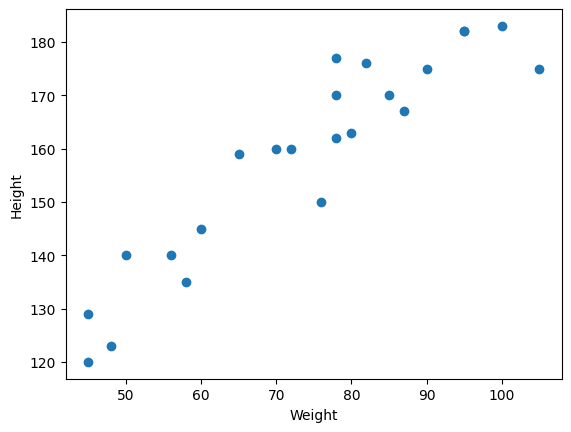

In [41]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [42]:
# differentiate dependent and independent features
X = df[['Weight']] #independent
X.head()


,Weight
0,45
1,58
2,48
3,60
4,70


In [43]:
y = df['Height'] # dependent
y.head()

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split 

In [45]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [46]:
X.shape,y.shape

((23, 1), (23,))

In [47]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [56]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [62]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

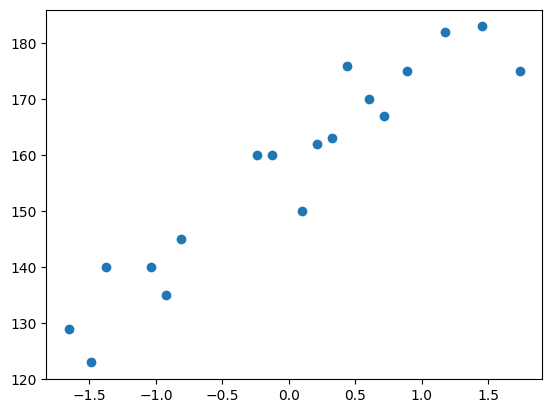

In [66]:
plt.scatter(X_train,y_train)

In [60]:
from sklearn.linear_model import LinearRegression

In [67]:
lr = LinearRegression(n_jobs=1)

In [68]:
lr.fit(X_train,y_train)

LinearRegression(n_jobs=1)

In [69]:
print('slope is : ',lr.coef_)
print('Intercept is : ',lr.intercept_)

slope is :  [17.03440872]
Intercept is :  157.5


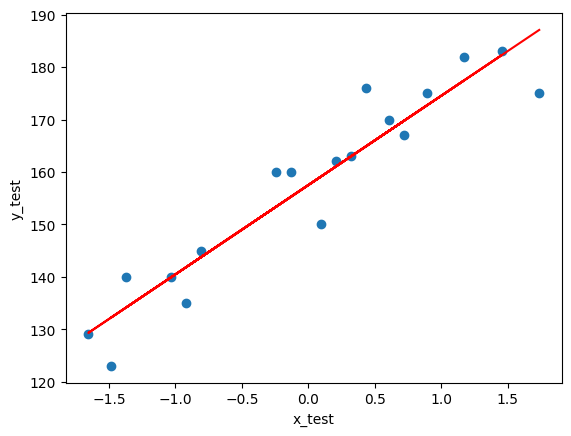

In [76]:
plt.scatter(X_train,y_train)
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.plot(X_train,lr.predict(X_train),'r')

In [79]:
y_pred = lr.predict(X_test)
y_pred


array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [80]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

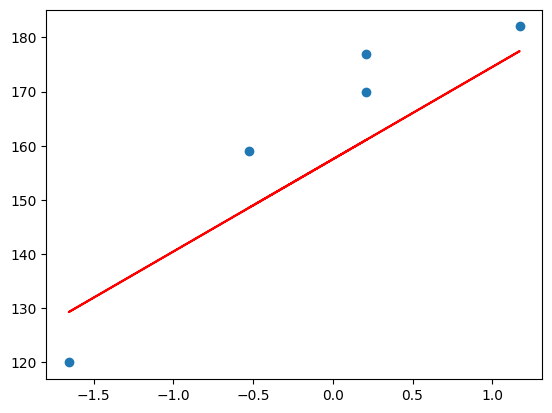

In [81]:
plt.scatter(X_test,y_test)
plt.plot(X_test,lr.predict(X_test),'r')

In [83]:
# now performance metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error ,root_mean_squared_error

In [86]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
man_rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
print(man_rmse)

109.77592599051664
9.822657814519232
10.477400726827081
10.477400726827081


In [88]:
from sklearn.metrics import r2_score
R2Score = r2_score(y_test,y_pred)
print(R2Score)

0.776986986042344


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables


In [89]:
#display adjusted R-squared
1 - (1-R2Score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [93]:
#new datapoint
scaled_weight = scaler.transform([[80]])
scaled_weight

/home/navneetsharma/Desktop/Data Science/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [ ]:
lr.predict(scaled_weight)
# lr.predict([scaled_weight[0]])

array([163.01076266])

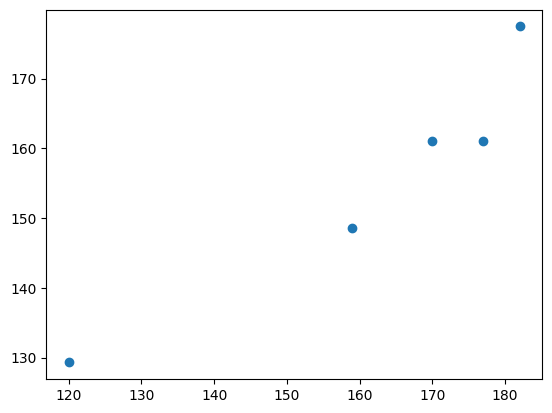

In [98]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred)

In [100]:
## Residuals
residuals=y_test-y_pred
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

/tmp/ipykernel_1112241/1427006691.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

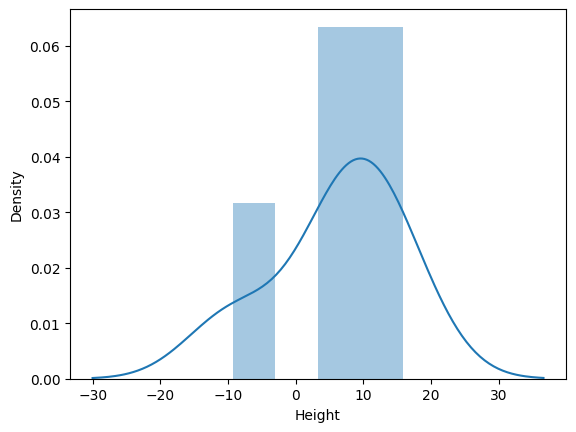

In [102]:
## plot this residuals
sns.distplot(residuals,kde=True)

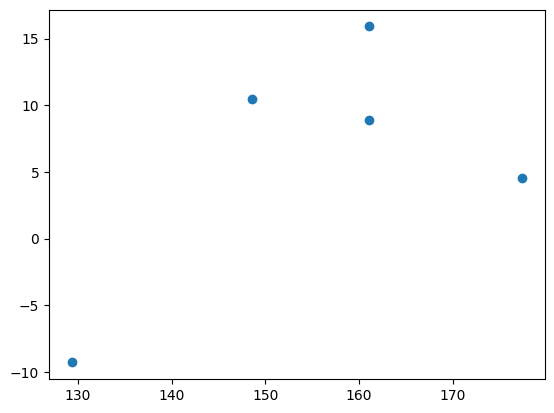

In [104]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred,residuals)